# Week 4 Assignment: High Frequency Words

Group 2: 

Katherine Evers, Juliann McEachern, Anthony Munoz, Mia Siracusa

Video Recording: https://www.loom.com/share/c1ca6eb3d1e94b01845411f24c3bdb23

### 1. Choose a corpus of interest

For this assignment, we will use Natural Language Toolkit (NLTK), which is an open source Python library for natural language processing. "NLTK includes a selection of texts from the Project Gutenberg electronic text archive. Over 25,000 free electronic books can be found on http://www.gutenberg.org/" (Tsvetovat & Kouznetsov 40). The goal of this assignment is to analyze the high frequency words found in our chosen corpus "Hamlet" by William Shakespeare.

In [4]:
#Load packages
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/katieevers/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/katieevers/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/katieevers/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [118]:
#Load texts from Project Gutenberg electronic text archive
nltk.download('gutenberg')
nltk.corpus.gutenberg.fileids()

[nltk_data] Downloading package gutenberg to
[nltk_data]     /Users/katieevers/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


[u'austen-emma.txt',
 u'austen-persuasion.txt',
 u'austen-sense.txt',
 u'bible-kjv.txt',
 u'blake-poems.txt',
 u'bryant-stories.txt',
 u'burgess-busterbrown.txt',
 u'carroll-alice.txt',
 u'chesterton-ball.txt',
 u'chesterton-brown.txt',
 u'chesterton-thursday.txt',
 u'edgeworth-parents.txt',
 u'melville-moby_dick.txt',
 u'milton-paradise.txt',
 u'shakespeare-caesar.txt',
 u'shakespeare-hamlet.txt',
 u'shakespeare-macbeth.txt',
 u'whitman-leaves.txt']

In [47]:
#Select Hamlet text and store in variable
text = nltk.corpus.gutenberg.raw('shakespeare-hamlet.txt')

### 2. How many total unique words are in the corpus? (Please feel free to define unique words in any interesting, defensible way)

Normalize text:
Let's convert the text to lowercase so we do not double count words. In addition, let's utilize lemmatization which involves identifying each word's lemma by removing any affixes and ensuring the resulting form is in the dictionary.  "Lemmatization is a process that maps the various forms of a word (such as appeared, appears) to the canonical or citation form of the word, also known as the lexeme or lemma (e.g., appear)" (Tsvetovat & Kouznetsov 121). Thus, we are using the definition of "lemmas" to define "unique words".

In [98]:
#Break up the text into tokens-sequences of characters that we want to treat as a group
tokens = word_tokenize(text)
words = [w for w in tokens if w.isalpha()]
#convert to lowercase
words = [w.lower() for w in words]

In [101]:
#Lemmatize words
wordnet = WordNetLemmatizer()
lemma = [wordnet.lemmatize(w) for w in words]
lemma = set(lemma)

"A word “token” is a particular appearance of a given word in a text; a word “type” is the unique form of the word as a particular sequence of letters. We count word tokens using len(text) and word types using len(set(text))" (Tsvetovat & Kouznetsov 33).

In [119]:
#Number of unique words in corpus
uniqueWords = len(set(words))
uniqueWords

print "Number of unique words in corpus: ", uniqueWords

Number of unique words in corpus:  4563


### 3. Taking the most common words, how many unique words represent half of the total words in the corpus?

In [54]:
#Create frquency distribution of words
fd = nltk.FreqDist(words)
#Store 200 most common words in a variable
topWords = fd.most_common(200)

In [124]:
#Use for loop to count how many unique words represent half of total words in corpus
i = 0
half = []
for w in topWords:
    if i >= len(tokens)/2:
        break
    else:
        i = i + w[1]
        half.append(w)

halfCount = len(half)

print "Number of unique words that represent half of the total words in the corpus: ", halfCount

Number of unique words that represent half of the total words in the corpus:  145


In [125]:
#Data frame of unique words
halfdf = pd.DataFrame(half, columns = ['Words','Count'])
halfdf

Words  Count
0        the    993
1        and    862
2         to    683
3         of    610
4          i    560
5        you    527
6         my    502
7          a    497
8         it    419
9         in    388
10      that    376
11        is    372
12       ham    337
13       not    327
14       his    285
15      this    275
16      with    254
17      your    253
18       but    249
19       for    243
20        me    228
21      what    211
22      lord    211
23        as    205
24        he    202
25        be    191
26        so    189
27       him    178
28      haue    175
29      king    172
..       ...    ...
115   heauen     43
116    rosin     43
117   thinke     42
118      who     42
119     thus     41
120   mother     40
121  horatio     40
122     play     40
123   queene     39
124    polon     38
125    night     38
126      yet     37
127    death     36
128  laertes     35
129       vp     35
130     both     34
131   againe     34
132    soule     33
133       th     33
134     life     32
135      nor     32
136     take     32
137      mar     31
138    looke     31
139    could     31
140     owne     31
141     dead     30
142    heare     30
143    might     30
144      clo     29

[145 rows x 2 columns]

### 4. Identify the 200 highest frequency words in this corpus

In [105]:
#Create data frame of top 200 most common words
topWordsDf = pd.DataFrame(topWords, columns = ['Word', 'Count'])
topWordsDf

Word  Count
0         the    993
1         and    862
2          to    683
3          of    610
4           i    560
5         you    527
6          my    502
7           a    497
8          it    419
9          in    388
10       that    376
11         is    372
12        ham    337
13        not    327
14        his    285
15       this    275
16       with    254
17       your    253
18        but    249
19        for    243
20         me    228
21       what    211
22       lord    211
23         as    205
24         he    202
25         be    191
26         so    189
27        him    178
28       haue    175
29       king    172
..        ...    ...
170     neuer     24
171       day     24
172      call     23
173    exeunt     23
174     comes     23
175    though     22
176       put     22
177       set     22
178     sweet     22
179     earth     21
180      true     21
181       mad     21
182  madnesse     21
183       hee     21
184    follow     21
185       two     21
186      done     21
187      euen     21
188     ghost     21
189     deere     20
190     guild     20
191   against     20
192      eyes     20
193  denmarke     20
194     seene     20
195     those     20
196     poore     20
197     faire     20
198   england     20
199   fathers     20

[200 rows x 2 columns]

###  5. Create a graph that shows the relative frequency of these 200 words

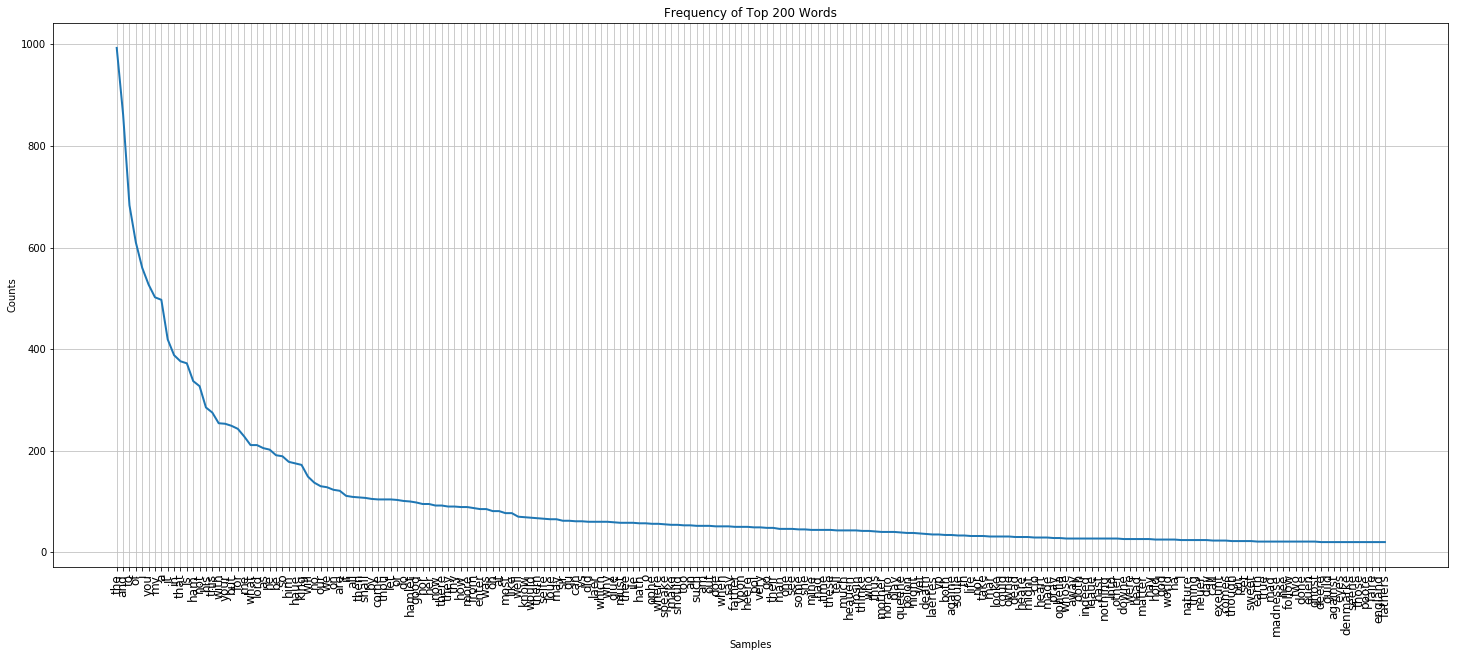

In [127]:
#Set dimensions and labels of plot 
plt.figure(figsize=(25, 10))
plt.rc('xtick', labelsize=12)
plt.title('Frequency of Top 200 Words')
#Plot top 200 words
fd.plot(200)

Let's look at the frequency plot of the top 50 words with common words removed

In [102]:
stoplist = stopwords.words('english')
#Remove common words
uncommonWords = [w for w in words if w not in stoplist]
ucfd = nltk.FreqDist(uncommonWords)

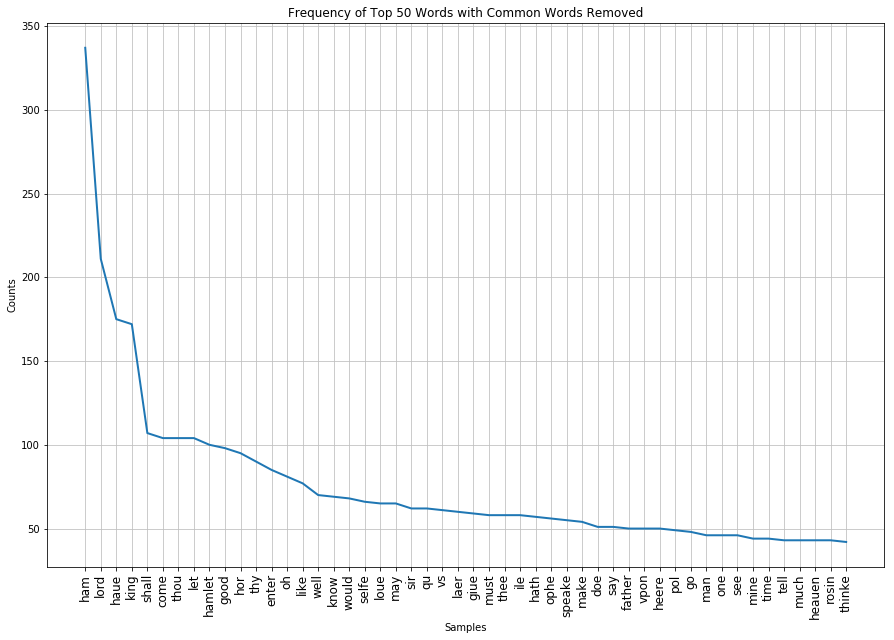

In [129]:
#Create plot
plt.figure(figsize=(15, 10))
plt.rc('xtick', labelsize=12) 
plt.title('Frequency of Top 50 Words with Common Words emoved')
ucfd.plot(50)

####  6. Does the observed relative frequency of these words follow Zipf’s law? Explain

"Zipf’s Law states that the frequency of a word type is inversely
proportional to its rank (i.e., f × r = k, for some constant k). For example, the 50th
most common word type should occur three times as frequently as the 150th most
common word type" (Tsvetovat & Kouznetsov 76). Zipf's Law is most easily observed by plotting the data on a log-log graph, with the axes being log (rank order) and log (frequency). Data conform to Zipf's Law if the plot is linear.

In [95]:
#Set x and y values
x = [i+1 for i in range(len(topWords))]
y = [freq for (word,freq) in topWords]

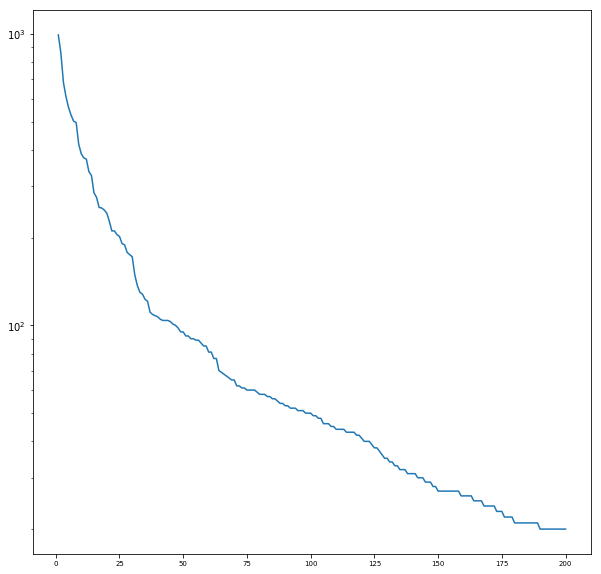

In [104]:
#Plot graph
plt.figure(1, figsize=(10,10))
plt.semilogy(x, y)
plt.show()

As stated before, data conform to Zipf's Law if the graph is linear. We see the above graph is curved, which indicates that the corpus does not conform to Zipf's Law.

#### 7. In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora"

This corpus uses much of the same “common” words (prepositions and pronouns) found across all corpora in the English language such as "the", "and", "to", and "of". However, when eliminating "common" words (demonstrated in step 5), we are left with high frequency words including "lord", "king", "hamlet", and "shall", which are specific to this particular corpus. The frequency of words in this corpus may differ from all words in all corpora due to the time period this play was written, its genre, subject, intended audience, and author's word choice.

#### Reference:

Social Network Analysis for Startups, Maksim Tsvetovat and Alexander Kouznetsov, O'Reilly, Sep 30, 2011.